In [2]:
import pandas as pd
data = pd.read_csv("albumtsne.csv")

print("Success!")


data.head()

Success!


Unnamed: 0  albums  all_genres       avg  styles  country  label
0           0      10         6.0  3.444444     8.0      1.0    1.0
1           1       8         1.0  2.571429     6.0      3.0    5.0
2           2       2         1.0  0.000000     1.0      1.0    1.0
3           3      41         1.0  0.600000    27.0      5.0   18.0
4           4      41         1.0       NaN     NaN      NaN    NaN

In [3]:
data.columns =["artist", "albums", "all_genres", "DeltaMean", "styles", "Country", "label"]
data.head()


artist  albums  all_genres  DeltaMean  styles  Country  label
0       0      10         6.0   3.444444     8.0      1.0    1.0
1       1       8         1.0   2.571429     6.0      3.0    5.0
2       2       2         1.0   0.000000     1.0      1.0    1.0
3       3      41         1.0   0.600000    27.0      5.0   18.0
4       4      41         1.0        NaN     NaN      NaN    NaN

In [4]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

In [5]:
X = data.iloc[:,1:7]

print("ready")

X.head()



ready


albums  all_genres  DeltaMean  styles  Country  label
0      10         6.0   3.444444     8.0      1.0    1.0
1       8         1.0   2.571429     6.0      3.0    5.0
2       2         1.0   0.000000     1.0      1.0    1.0
3      41         1.0   0.600000    27.0      5.0   18.0
4      41         1.0        NaN     NaN      NaN    NaN

In [6]:
print(X.shape)

(172772, 6)


In [7]:

#feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
#data.head()


In [8]:
from sklearn.decomposition import PCA

def run_pca(data, dimensions):
  pca = PCA(n_components=dimensions)
  pca.fit(data)
  pca_results = pca.transform(data.values)
  return pca_results


In [9]:
cols = ["albums", "all_genres", "DeltaMean", "styles", "Country", "label"]
for i in cols:
    a = X[i].mean()
    X.loc[X[i].isna(), i] = a
X.head(100)

    


albums  all_genres  DeltaMean     styles   Country     label
0     10.0         6.0   3.444444   8.000000  1.000000   1.00000
1      8.0         1.0   2.571429   6.000000  3.000000   5.00000
2      2.0         1.0   0.000000   1.000000  1.000000   1.00000
3     41.0         1.0   0.600000  27.000000  5.000000  18.00000
4     41.0         1.0   2.040990   3.728015  1.987074   3.50671
5     11.0         2.0   0.525000   9.000000  5.000000  14.00000
6     26.0         1.0   2.040990   3.728015  1.987074   3.50671
7      3.0         6.0   0.400000   8.000000  2.000000   2.00000
8      3.0         1.0   0.960000   8.000000  3.000000  15.00000
9      4.0         1.0   0.000000   1.000000  2.000000   1.00000
10    22.0         1.0   2.040990   3.728015  1.987074   3.50671
11    22.0         1.0   3.500000   2.000000  1.000000   2.00000
12     7.0         1.0   2.040990   3.728015  1.987074   3.50671
13    21.0         1.0   2.040990   3.728015  1.987074   3.50671
14    26.0         3.0   2.000000   3.000000  1.000000   1.00000
15     3.0         1.0   2.040990   3.728015  1.987074   3.50671
16    17.0         1.0   0.904762   9.000000  7.000000  14.00000
17     5.0         1.0   0.761905  13.000000  3.000000   9.00000
18    33.0         1.0   2.040990   3.728015  1.987074   3.50671
19     2.0         1.0   3.000000   2.000000  3.000000   5.00000
20     2.0         3.0   0.800000   8.000000  2.000000   2.00000
21    15.0        11.0   0.920000  15.000000  2.000000   8.00000
22    21.0         1.0   1.000000   2.000000  1.000000   2.00000
23     9.0         1.0   2.040990   3.728015  1.987074   3.50671
24    48.0         1.0   0.625000  15.000000  4.000000  12.00000
25     6.0         1.0   3.000000   3.000000  2.000000   4.00000
26     4.0         1.0   0.500000  20.000000  7.000000  28.00000
27    15.0         1.0   2.040990   3.728015  1.987074   3.50671
28     5.0         1.0   0.000000   1.000000  1.000000   1.00000
29     8.0         1.0   4.000000   1.000000  1.000000   2.00000
..     ...         ...        ...        ...       ...       ...
70    30.0         3.0   1.142857   7.000000  2.000000   6.00000
71     3.0         1.0   0.571429   7.000000  1.000000   6.00000
72    12.0         1.0   2.040990   3.728015  1.987074   3.50671
73    18.0         1.0   1.500000   2.000000  1.000000   1.00000
74    19.0        18.0   1.500000  13.000000  5.000000   7.00000
75     8.0         1.0   0.333333   3.000000  1.000000   3.00000
76    28.0         3.0   0.560000  12.000000  3.000000   7.00000
77     3.0         3.0   0.361702   9.000000  4.000000  16.00000
78     2.0        26.0   1.047619  34.000000  6.000000  11.00000
79     8.0         3.0   1.900000   9.000000  3.000000   6.00000
80    13.0         1.0   1.000000   2.000000  1.000000   1.00000
81     7.0         1.0   0.900000  16.000000  3.000000   6.00000
82     3.0         5.0   0.800000  13.000000  3.000000   6.00000
83    10.0         4.0   0.913043  13.000000  5.000000  10.00000
84     4.0         1.0   2.040990   3.728015  1.987074   3.50671
85    49.0         2.0   0.333333   8.000000  4.000000   6.00000
86     4.0         5.0   3.250000   4.000000  1.000000   2.00000
87    24.0         1.0   1.312500   9.000000  4.000000   8.00000
88    17.0         1.0   0.727273  14.000000  8.000000  20.00000
89     8.0         1.0   2.166667   6.000000  2.000000   4.00000
90    27.0         1.0   0.451613  23.000000  3.000000   6.00000
91     9.0         3.0   1.000000  17.000000  2.000000   6.00000
92     6.0         1.0   2.040990   3.728015  1.987074   3.50671
93    46.0         1.0   2.040990   3.728015  1.987074   3.50671
94    19.0         1.0   3.333333   2.000000  1.000000   3.00000
95    15.0         1.0   0.692308   8.000000  3.000000   8.00000
96     4.0         1.0   2.040990   3.728015  1.987074   3.50671
97    35.0         1.0   1.166667   6.000000  1.000000   2.00000
98     3.0         7.0   0.904762  20.000000  3.000000  11.00000
99    26.0         1.0   2.040990   3.7

In [13]:
data = X.sample(500).values

## Start final analysis now

In [38]:
data2 = pd.read_csv("sixClusters.csv")
y = data2.cluster
print(y)

cols =["albums", "all_genres", "avg", "styles", "country", "label"]
data = data2[cols]

0        917
1        917
2       8820
3       8820
4       8820
5         44
6       8820
7         44
8         44
9       8820
10      8820
11      8820
12      8820
13        44
14      8820
15        44
16      8820
17      8820
18      8820
19      8820
20       917
21      8820
22      8820
23        44
24      8820
25      8820
26        44
27      8820
28      8820
29      8820
        ... 
9970    8820
9971    8820
9972     755
9973    8820
9974    8820
9975      44
9976    8820
9977    8820
9978      44
9979    8820
9980      44
9981      44
9982      44
9983    8820
9984      44
9985      44
9986    8820
9987     917
9988    8820
9989      44
9990    8820
9991     917
9992      44
9993      44
9994      44
9995      44
9996    8820
9997      44
9998    8820
9999    8820
Name: cluster, Length: 10000, dtype: int64


In [61]:
from sklearn.manifold import TSNE

def run_tsne(data):
  tsne = TSNE(
              verbose=2, 
              perplexity=10, 
              learning_rate=75.0)
  tsne_results = tsne.fit_transform(data)
  return tsne_results

In [62]:

results = run_tsne(data)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.049s...
[t-SNE] Computed neighbors for 10000 samples in 0.522s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.521s
[t-SNE] Iteration 50: error = 103.5116577, gradient norm = 0.3808149 (50 iterations in 22.438s)
[t-SNE] 

In [63]:
y.unique()

array([ 917, 8820,   44, 7483,  755, 4263], dtype=int64)

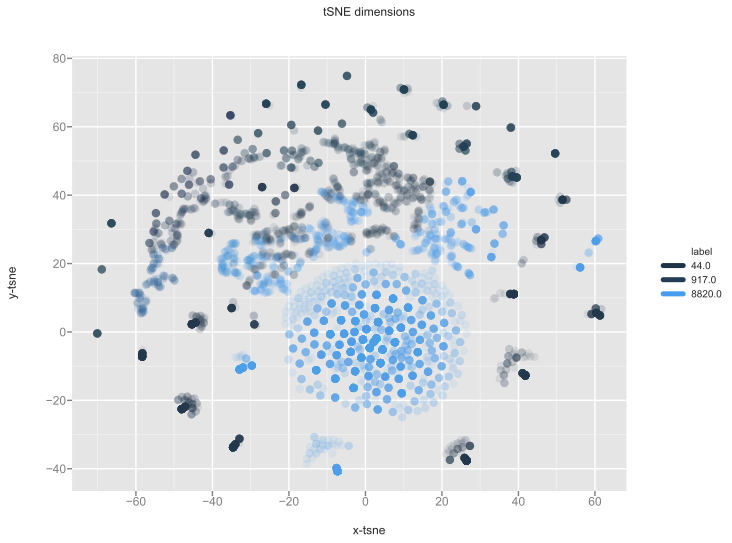

<ggplot: (-9223371896685042793)>

In [67]:
import ggplot
from ggplot import *
df_tsne = pd.DataFrame(results)
df_tsne['x-tsne'] = results[:,0]
df_tsne['y-tsne'] = results[:,1]
df_tsne['label'] = y


chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', colour ='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions")
chart

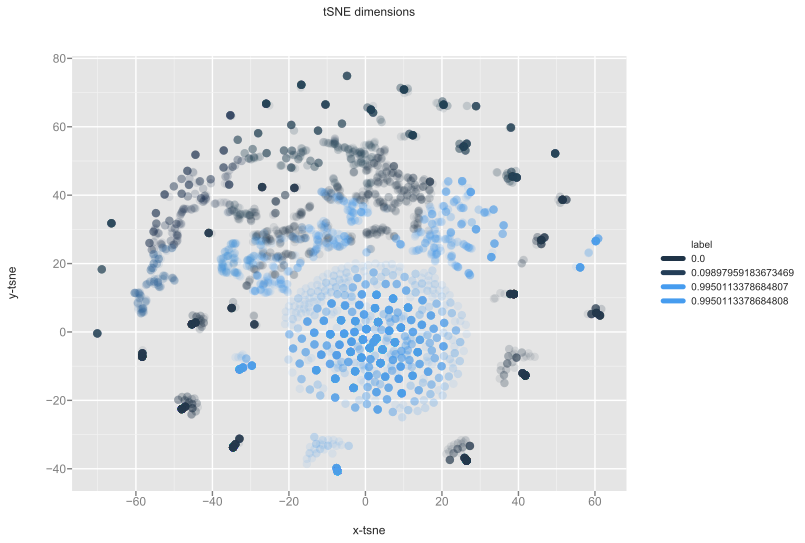

In [65]:
chart.save('discogs_tsn10e.png', dpi=120)